# DASPy Example

DAS data processing

## 1. Reading and visulization

          data: shape(500, 5000)
            dx: 1 m
            fs: 100.0 Hz
 start_channel: 2500
start_distance: 2520 m
    start_time: 2016-03-21 07:37:30.532309+00:00
   origin_time: 2016-03-21 07:37:10.535000+00:00
     data_type: Strain rate



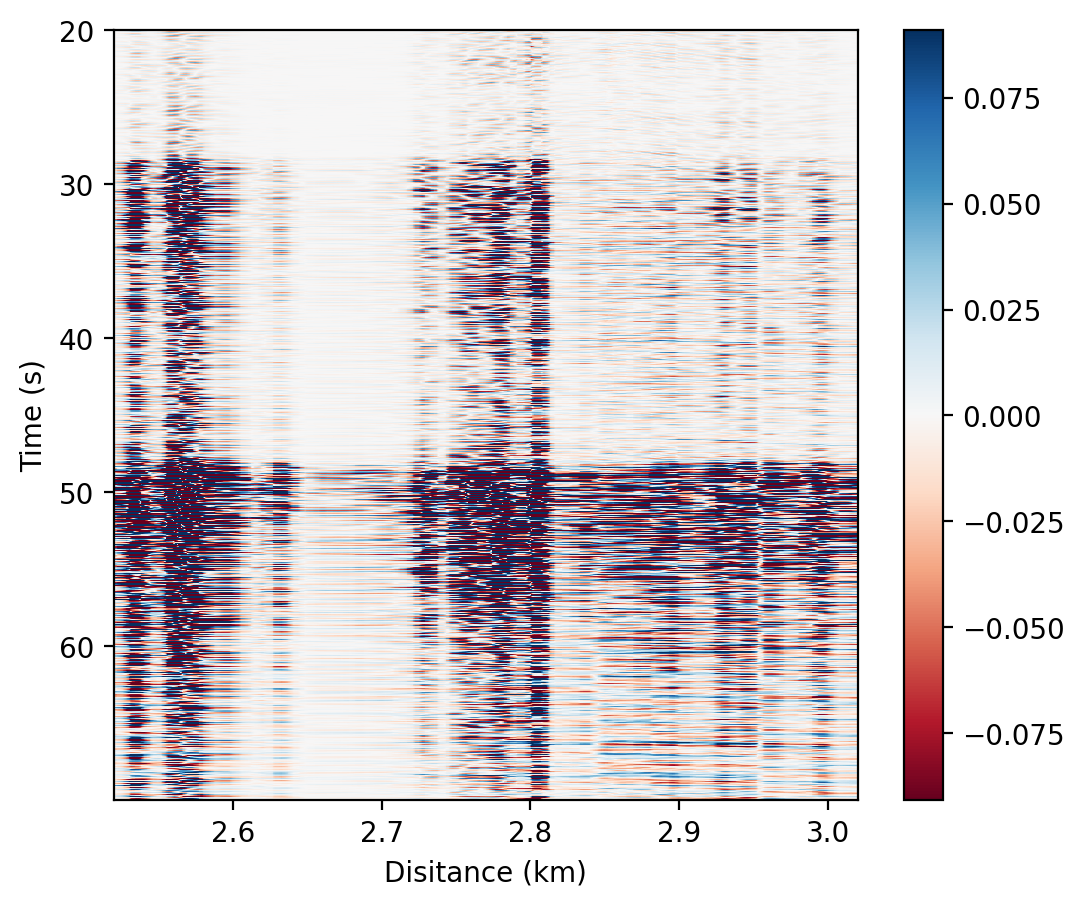

In [5]:
from daspy import read


sec = read() # input the path to the DAS file, here we use the example
print(sec)
sec.plot()

## 2. Frequency attribute

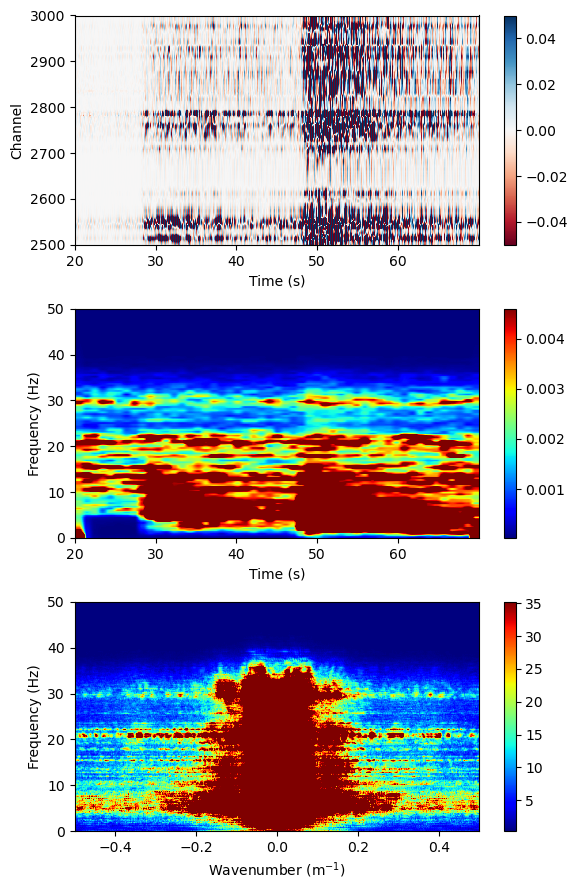

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, 1, figsize=(6,9), dpi=200)
sec.plot(ax=ax[0], obj='waveform', xmode='channel', tmode='origin', transpose=True, vmax=0.05)
sec.plot(ax=ax[1], obj='spectrogram', tmode='origin', kwargs_pro=dict(noverlap=156))
sec.plot(ax=ax[2], obj='fk')
plt.tight_layout()

## 3. Convert to velocity

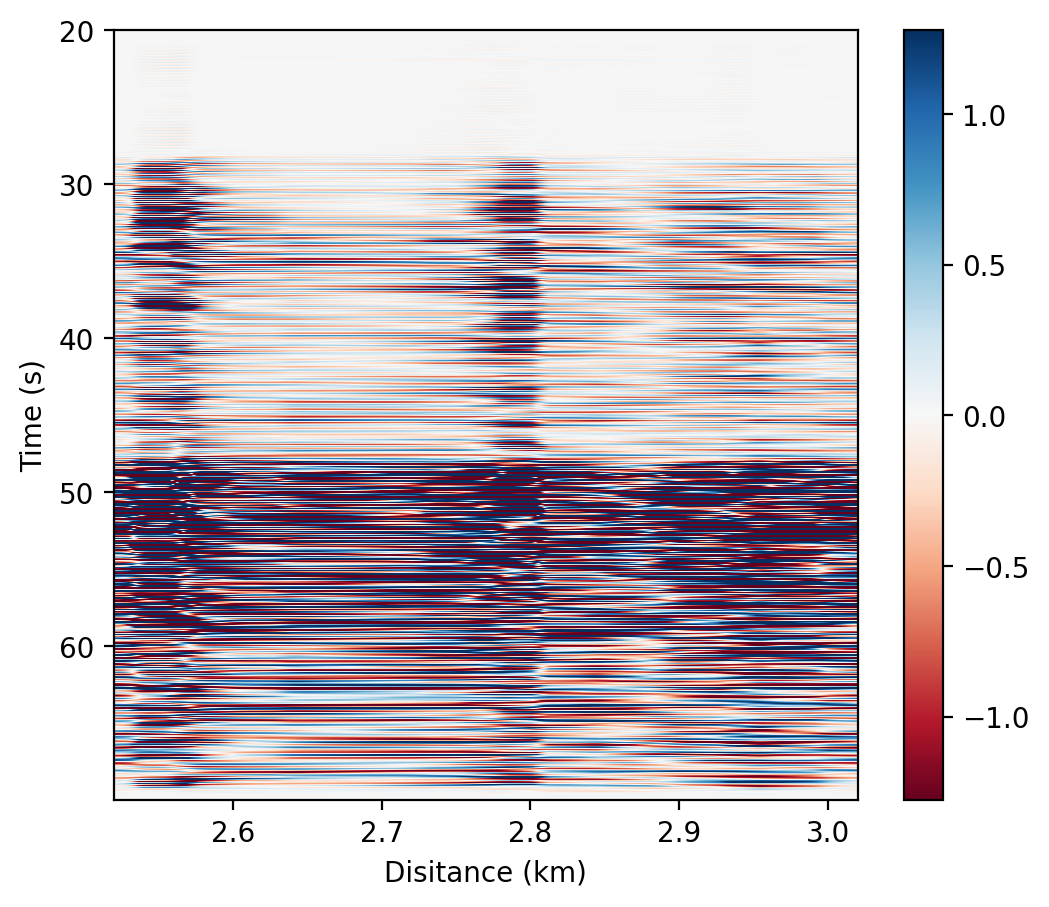

In [7]:
# integrate to strain
# bandpass filtering with detrending and taper
sec.time_integration().bandpass(1, 5, detrend=True, taper=0.05)


# add turning points into section (detected by DASPy)
sec.turning_channels = [2624, 2689, 2825, 2933]
sec.fk_rescaling(fmax=(5, 6))
sec.plot()
